Analysis
1. Most data displayed in Humidity vs. Latitude shows that at any random point on earth, you are more likely to experience high amounts of humidity than little or none. Based on an observation of the eye, humidity more than 40% is highly likely for any random point on the globe in this sample size.

2. Further data would need to be used to calculate a confidence interval for the analysis that the higher latitude you get, the more likely you are to experience higher wind speed. The data point, run on this code as the analysis is being written, at 65 Latitude has wind almost hitting 35 mph and should be further investigated if it's an outlier.   

3. An overall observation that may not be seen unless an observer takes a step back, is to realize this data only displays one day. Although this data is accurate for the day the code was run, it isn't conclusive of an average trend in data across the globe. In order to understand if most areas of the world are humid based on a random sample for example, the average of several years of daily data would need to be calculated and displayed. 


P.S. I had a fair amount of trouble with this homework, so my tutor helped me a lot through some of the snags I was experiencing.

In [28]:
import csv
import seaborn
import requests
import time
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import random
import urllib

api_key = "4328b000df419885e1b4acf29ef2cd9f"

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [29]:
lat_lngs = []
cities = []

# random lat and lng combinations
for x in range(1500):
    lats = numpy.random.uniform(low=-90.000, high=90.000)
    lngs = numpy.random.uniform(low=-180.000, high=180.000)

    city = citipy.nearest_city(lats, lngs).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

611

In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_data = []

print("Retrieving Data              ")
print("-----------------------------")

record_count = 1

for i, city in enumerate(cities):
    
    if (i % 500 == 0 and i < 502):
        record_count = 0
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    print("Processing Record %s of 500 | %s" % (record_count, city))
    print(city_url)    

    record_count += 1

    # API request
    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("Error locating City data. Skipping...")
        pass
              
print("-----------------------------")
print("Data Load Complete           ")
print("-----------------------------")

Retrieving Data              
-----------------------------
Processing Record 0 of 500 | barbar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=barbar
Error locating City data. Skipping...
Processing Record 1 of 500 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=punta%20arenas
Processing Record 2 of 500 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=bredasdorp
Processing Record 3 of 500 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=beyneu
Processing Record 4 of 500 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=taolanaro
Error locating City data. Skipping...
Processing Record 5 of 500 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 53 of 500 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=sao%20filipe
Processing Record 54 of 500 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=san%20patricio
Processing Record 55 of 500 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=vila%20velha
Processing Record 56 of 500 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=vaini
Processing Record 57 of 500 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=nikolskoye
Processing Record 58 of 500 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=dikson
Processing Record 59 of 500 | grindavik
http://api.openweathermap.org/data/2.5

Processing Record 107 of 500 | nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=nioro
Processing Record 108 of 500 | sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=sumbe
Processing Record 109 of 500 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=taoudenni
Processing Record 110 of 500 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=vila%20franca%20do%20campo
Processing Record 111 of 500 | hammerfest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=hammerfest
Processing Record 112 of 500 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=kruisfontein
Processing Record 113 of 500 | las palmas
http://api.ope

Processing Record 159 of 500 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=puerto%20escondido
Processing Record 160 of 500 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=ukiah
Processing Record 161 of 500 | amarwara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=amarwara
Processing Record 162 of 500 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=barrow
Processing Record 163 of 500 | babrala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=babrala
Processing Record 164 of 500 | aurad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=aurad
Processing Record 165 of 500 | dunedin
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 212 of 500 | mega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=mega
Processing Record 213 of 500 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=san%20cristobal
Processing Record 214 of 500 | panguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=panguna
Processing Record 215 of 500 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=opuwo
Processing Record 216 of 500 | aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=aflu
Error locating City data. Skipping...
Processing Record 217 of 500 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=bengkulu
Error locating City data. Skipping...
Processing Record 218 of

Processing Record 266 of 500 | isla mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=isla%20mujeres
Processing Record 267 of 500 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=belushya%20guba
Error locating City data. Skipping...
Processing Record 268 of 500 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=beringovskiy
Processing Record 269 of 500 | asosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=asosa
Processing Record 270 of 500 | isugod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=isugod
Processing Record 271 of 500 | trabzon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=trabzon
Processing Record 272 of 500 | s

Processing Record 319 of 500 | uray
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=uray
Processing Record 320 of 500 | haapiti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=haapiti
Processing Record 321 of 500 | morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=morondava
Processing Record 322 of 500 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=ucluelet
Processing Record 323 of 500 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=kavieng
Processing Record 324 of 500 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=haines%20junction
Processing Record 325 of 500 | mayo
http://api.openweathermap.org/data/2.5/weather

Processing Record 371 of 500 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=evensk
Processing Record 372 of 500 | corvallis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=corvallis
Processing Record 373 of 500 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=bethel
Processing Record 374 of 500 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=tautira
Processing Record 375 of 500 | tarana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=tarana
Processing Record 376 of 500 | hutang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=hutang
Processing Record 377 of 500 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 424 of 500 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=klaksvik
Processing Record 425 of 500 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=havoysund
Processing Record 426 of 500 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=kyzyl-suu
Processing Record 427 of 500 | madera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=madera
Processing Record 428 of 500 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=ilulissat
Processing Record 429 of 500 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=ngukurr
Error locating City data. Skipping...
Processing Record 430 of 500 | businga
http://api.

Processing Record 477 of 500 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=kudahuvadhoo
Processing Record 478 of 500 | ca mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=ca%20mau
Processing Record 479 of 500 | darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=darhan
Processing Record 480 of 500 | riihimaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=riihimaki
Processing Record 481 of 500 | fairhope
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=fairhope
Processing Record 482 of 500 | vredendal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=vredendal
Processing Record 483 of 500 | margate
http://api.openweathermap.org/data/2.5/weat

Processing Record 30 of 500 | pobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=pobe
Processing Record 31 of 500 | simeonovgrad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=simeonovgrad
Processing Record 32 of 500 | grand-santi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=grand-santi
Processing Record 33 of 500 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=cap%20malheureux
Processing Record 34 of 500 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=katsuura
Processing Record 35 of 500 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=faanui
Processing Record 36 of 500 | trinidad
http://api.openweathermap.org/data/2.5/

Processing Record 83 of 500 | presidente olegario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=presidente%20olegario
Processing Record 84 of 500 | khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=khash
Processing Record 85 of 500 | bloemhof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=bloemhof
Processing Record 86 of 500 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=noumea
Processing Record 87 of 500 | tambacounda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=tambacounda
Processing Record 88 of 500 | abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4328b000df419885e1b4acf29ef2cd9f&q=abha
Processing Record 89 of 500 | chlorakas
http://api.openweathermap.org/data/2.5/wea

In [31]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

city_data_pd.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [32]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75,CL,1529902800,93,-53.16,-70.91,35.60,6.93
1,bredasdorp,92,ZA,1529899200,76,-34.53,20.04,51.80,5.82
2,beyneu,12,KZ,1529905025,14,45.32,55.19,94.97,4.61
3,qasigiannguit,88,GL,1529902200,93,68.82,-51.19,35.60,5.82
4,jamestown,92,AU,1529905026,73,-33.21,138.60,49.25,4.50


Latitude vs. Humidity Plot

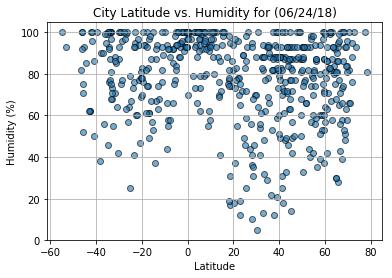

In [33]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.6, label="Cities")

plt.title("City Latitude vs. Humidity for (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

Latitude vs Temperature Plot

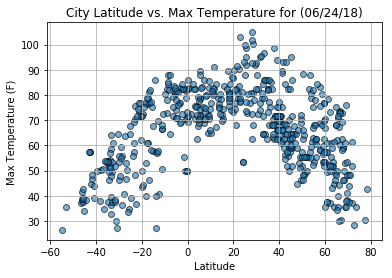

In [34]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.6, label="Cities")

plt.title("City Latitude vs. Max Temperature for (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

Latitude vs. Cloudiness Plot

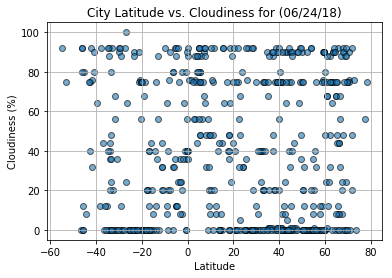

In [35]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.6, label="Cities")

plt.title("City Latitude vs. Cloudiness for (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

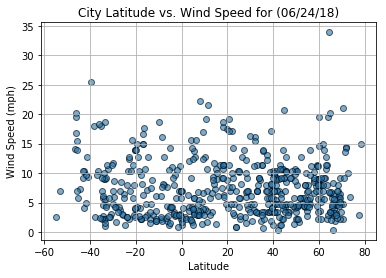

In [36]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.6, label="Cities")

plt.title("City Latitude vs. Wind Speed for (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()